In [241]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

In [242]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")

### KNN Regression

In order to find the best value for $k$, we will train and make predictions on different models with
$$
    k = 1, 2, \ldots, 15.
$$
For each model we will then score the predictions and choose the $k$ with the best score.

In [243]:
# We will use the scikit-learn implementation of the model
from sklearn.neighbors import KNeighborsRegressor

knn_models = {}

# We will analize models with different 'k' values
max_k = 15

for k in range(1, max_k + 1):
    print(f"Training KNN model with n_neighbors = {k}")
    knn_models[k] = KNeighborsRegressor(n_neighbors=k)
    knn_models[k].fit(X_train, y_train)


Training KNN model with n_neighbors = 1
Training KNN model with n_neighbors = 2
Training KNN model with n_neighbors = 3
Training KNN model with n_neighbors = 4
Training KNN model with n_neighbors = 5
Training KNN model with n_neighbors = 6
Training KNN model with n_neighbors = 7
Training KNN model with n_neighbors = 8
Training KNN model with n_neighbors = 9
Training KNN model with n_neighbors = 10
Training KNN model with n_neighbors = 11
Training KNN model with n_neighbors = 12
Training KNN model with n_neighbors = 13
Training KNN model with n_neighbors = 14
Training KNN model with n_neighbors = 15


After the training is complete we will the all the $15$ models, and score their prediction using *Mean Squared Error* (or **RMSE**) and the *R2* scores.

The best model will be the one with the *lowest* **RMSE** score and the *highest* **R2** score.

In [244]:
y_predictions = {}
RMSE_knn = {}
R2_knn = {}

for k, model in knn_models.items():
    print(f"Making predictions for KNN model with n_neighbors = {k}")
    y_predictions[k] = model.predict(X_test)

    # Calculate the scores for the predictions
    RMSE_knn[k] = metrics.mean_squared_error(y_test, y_predictions[k], squared=False)
    R2_knn[k] = metrics.r2_score(y_test, y_predictions[k])

best_k = min(RMSE_knn, key=RMSE_knn.get)
print(f"Best value for 'k' {best_k}")

Making predictions for KNN model with n_neighbors = 1
Making predictions for KNN model with n_neighbors = 2
Making predictions for KNN model with n_neighbors = 3
Making predictions for KNN model with n_neighbors = 4
Making predictions for KNN model with n_neighbors = 5
Making predictions for KNN model with n_neighbors = 6
Making predictions for KNN model with n_neighbors = 7
Making predictions for KNN model with n_neighbors = 8
Making predictions for KNN model with n_neighbors = 9
Making predictions for KNN model with n_neighbors = 10
Making predictions for KNN model with n_neighbors = 11
Making predictions for KNN model with n_neighbors = 12
Making predictions for KNN model with n_neighbors = 13
Making predictions for KNN model with n_neighbors = 14
Making predictions for KNN model with n_neighbors = 15
Best value for 'k' 4


The best model is the one with $k$ equal to the variable $best\_k$.

Let's plot the scores calculated in the previous step for each model, showing the corresponding $k$ value.

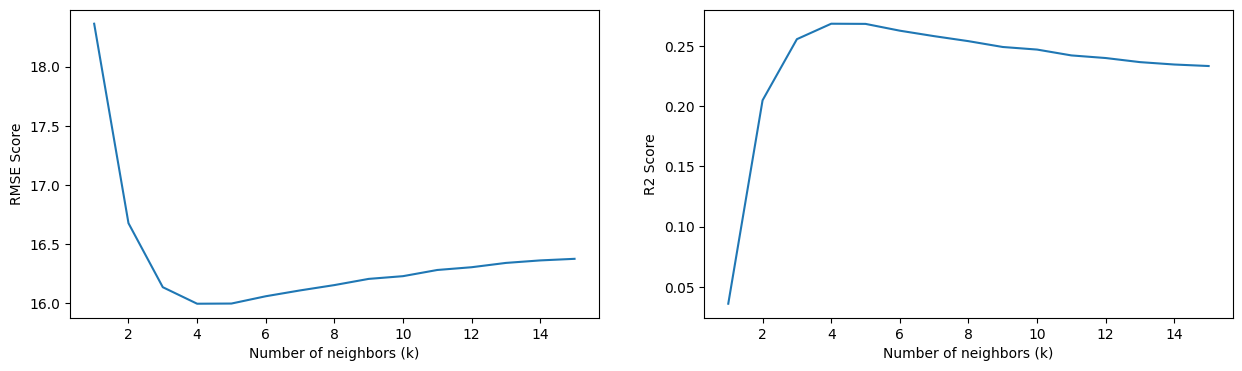

In [245]:
figure, axis = plt.subplots(1, 2, figsize=(15, 4)) 

KNN_y_label = "Number of neighbors (k)"

KNN_X = RMSE_knn.keys()

axis[0].plot(KNN_X, RMSE_knn.values())
axis[0].set_xlabel(KNN_y_label)
axis[0].set_ylabel("RMSE Score")

axis[1].plot(KNN_X, R2_knn.values())
axis[1].set_xlabel(KNN_y_label)
axis[1].set_ylabel("R2 Score")

plt.show()

We note that the point of *minimum* in the **RMSE** plot is equal to the point of *maximum* in the **R2** plot.
This is given by the fact that the two scores are inversely proportional.

The analysis was conducted with $k=1,\ldots,15$.
Intuitively, analysing models with $k$ larger than $15$ would be useless, since they would just keep *underfitting* the data, hence getting worse score.

In [246]:

print(f"RMSE: {RMSE_knn[best_k]}")
print(f"R2: {R2_knn[best_k]}")

RMSE: 15.996204170872758
R2: 0.26841163203143736


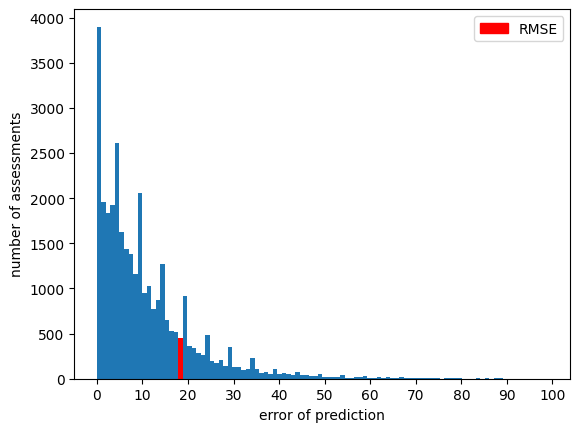

In [247]:
import matplotlib.patches as mpatches

y_pred= y_predictions[best_k].round()
y_test_ = y_test.round()
y_diff= y_pred-y_test_.values
y_diff= abs(y_diff)
errori = np.zeros(100)

errori[0] = np.logical_and(y_diff >= 0, y_diff <= 1).sum()
for i in range(1,99):
    errori[i] = np.logical_and(y_diff > i, y_diff <= i+1).sum()

x = [i for i in range(100)]
plt.xticks([i*10 for i in range(11)])
_, _, patches = plt.hist(x=x,weights=errori,bins =100)
patches[18].set_facecolor('r')
plt.xlabel("error of prediction")
plt.ylabel("number of assessments")
red_patch = mpatches.Patch(color='red', label='RMSE')
plt.legend(handles=[red_patch]) 
plt.show()

In [248]:
n_classes = 10
y_pred = y_predictions[best_k]

errors = np.absolute(y_test.values - y_pred)

mean_diff = np.zeros(n_classes)

for i in range(n_classes):
    r = int(100/n_classes)
    mean_diff[i] = errors[np.logical_or(y_test//(r) == i, y_test//(r) + i == n_classes*2 - 1)].mean()


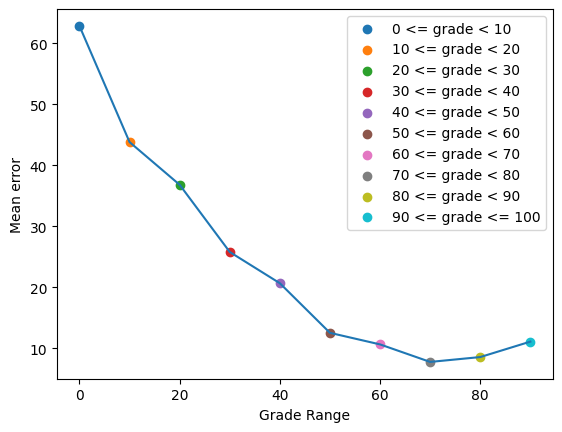

In [249]:
classes = [i*10 for i in range(n_classes)]

for j, c in enumerate(classes):
    plt.scatter(c, mean_diff[j], label=f'{(j*10)} <= grade <{"=" if j == n_classes-1 else ""} {(j+1)*10}')

plt.plot(classes, mean_diff)

plt.xlabel("Grade Range")
plt.ylabel("Mean error")

plt.legend()

plt.show()

The plot below represents the number of wrong prediction for some error values.

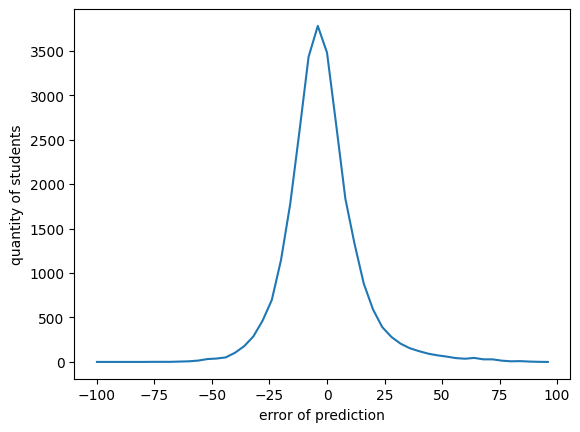

In [250]:

intervals=50
sliceInterval= 200/intervals
quantities=np.zeros(intervals)
values=np.zeros(intervals)
y_diff=y_predictions[5]-y_test.values

for j in range(intervals):
    quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()
    values[j]=(sliceInterval*j)-100

plt.plot(values,quantities)
plt.xlabel("error of prediction")
plt.ylabel("quantity of students")
plt.show()